<a href="https://colab.research.google.com/github/BrouthenKamel/Machine_Learning_Project/blob/main/Heart_Attack_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
dataset = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [ ]:
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
chest_pain = { 1:'typical angina' , 2:'atypical angina' , 3:'non-anginal pain' , 4:'asymptomatic' }
ecg = { 0:'normal' , 1:'ST-T wave abnormality' , 2:'left ventricular hypertrophy' }
slope = { 1:'upsloping' , 2:'flat' , 3:'downsloping' }
dataset = dataset.replace( { "chest pain type" : chest_pain , "resting ecg" : ecg , "ST slope" : slope } )
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,0,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,1,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,0,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,1,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,1,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,1,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,0,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


In [ ]:
dataset.rename( columns = { 'target' : 'heart attack' } , inplace= True )

In [ ]:
dataset.describe()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heart attack
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,0.424884,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [ ]:
dataset.rename( columns = { "resting bp s" : "resting bps" } , inplace = True )
dataset.drop( dataset[ dataset["resting bps"] == 0 ].index , inplace = True )
dataset["resting bps"].sort_values()

315      80
228      92
834      94
694      94
1018     94
       ... 
242     200
734     200
366     200
1013    200
400     200
Name: resting bps, Length: 1189, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9127d7e610>,
      dtype=object)

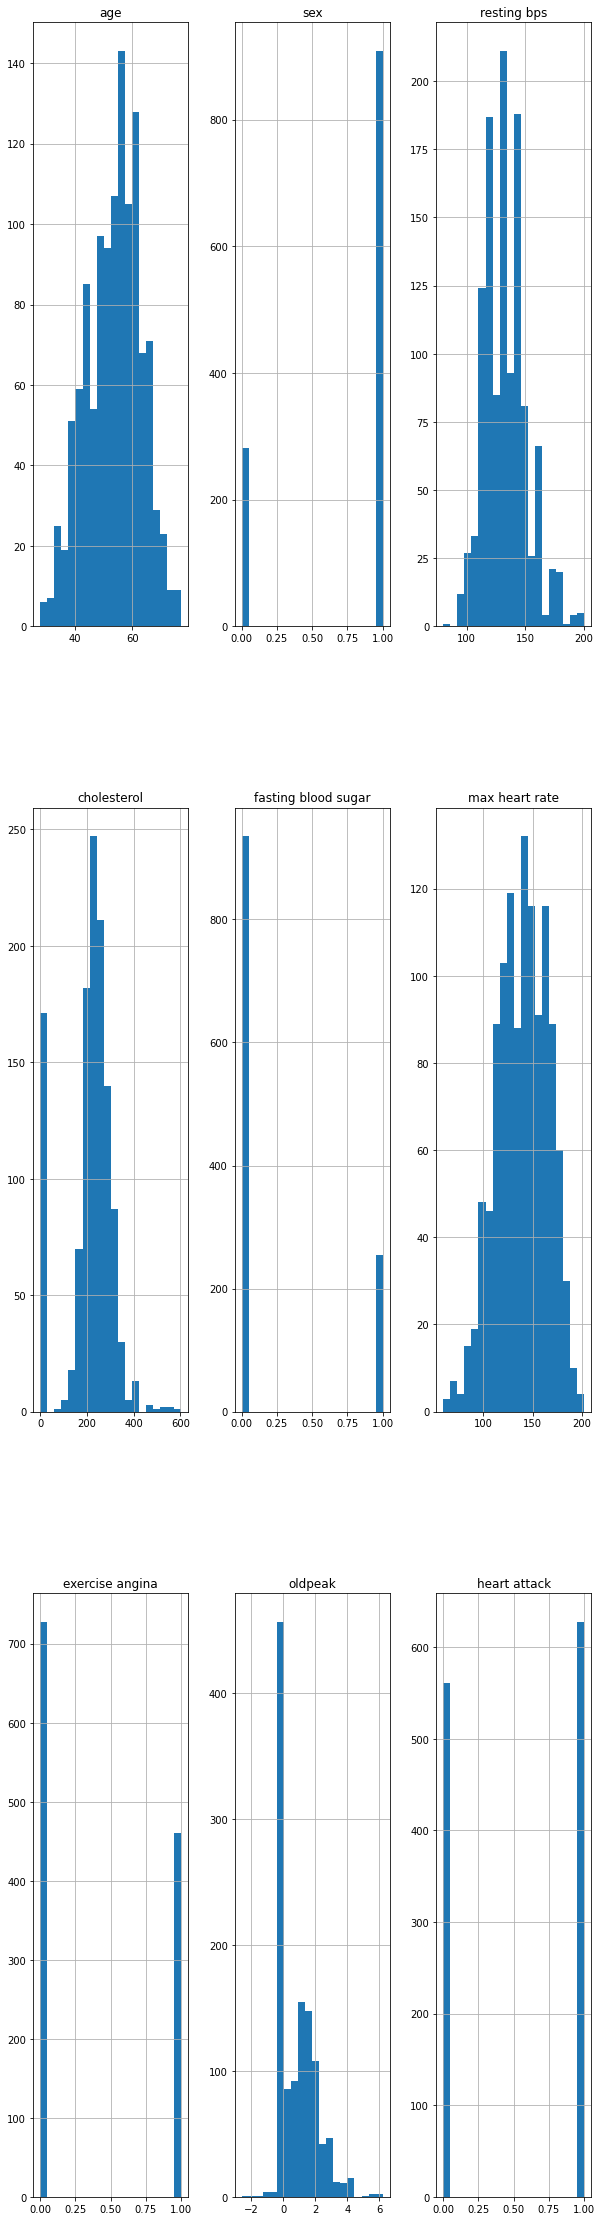

In [ ]:
dataset.hist( bins = 20 , figsize = (10,40))

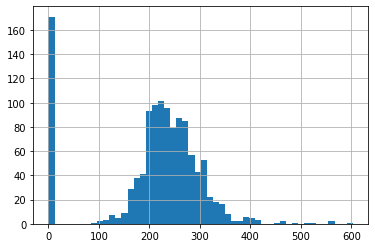

In [ ]:
dataset["cholesterol"].hist(bins=50)

In [ ]:
dataset.drop( dataset[ dataset['cholesterol'] == 0 ].index , inplace = True )
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1018 non-null   int64  
 1   sex                  1018 non-null   int64  
 2   chest pain type      1018 non-null   object 
 3   resting bps          1018 non-null   int64  
 4   cholesterol          1018 non-null   int64  
 5   fasting blood sugar  1018 non-null   int64  
 6   resting ecg          1018 non-null   object 
 7   max heart rate       1018 non-null   int64  
 8   exercise angina      1018 non-null   int64  
 9   oldpeak              1018 non-null   float64
 10  ST slope             1018 non-null   object 
 11  heart attack         1018 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 135.7+ KB
